# ニューラルネットワーク

教師あり学習において、画像認識などの説明変数(フィーチャー)が多くなる場合を考えたときに、想定される計算量が多くなってしまい、現実的ではない。  
そのような場合に有効になるのがニューラルネットワークというアルゴリズムです。



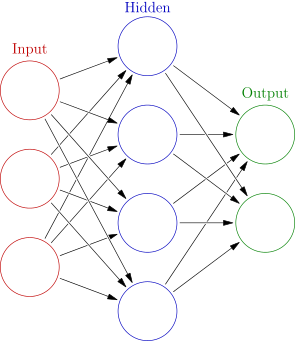

In [15]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png'
from IPython.display import Image
Image(url, width=250, height=200)

インプット$X$からアウトプット$Y$を予測する際、その間にhidden layerが入ることで非線形の複雑な計算を可能にします。  
このhidden layerには、インプットでもアウトプットでもないアクチベーションユニット (activation unit: $a^{(j)}_i$というものが入っています。

$a_i^{(j)}$ = レイヤー$j$のユニット$i$  

$\Theta{(j)}$ = レイヤー$j$からレイヤー$j+1$への遷移を重み付けするパラメーター

各アクチベーションユニットの値は、前のレイヤーからの入力によって決まります。  
具体的には、ロジスティック回帰によって決まります。

レイヤー$j+1$にある$i$番目のアクチベーションユニット$a_i^{(j+1)}$は、ロジスティック回帰により以下の式となる。

$a_i^{(j+1)} = g(\Theta_{i,0}^{(j)} a_{0}^{(j)} + \Theta_{i,1}^{(j)} a_{1}^{(j)} + \cdots + \Theta_{i,n}^{(j)} a_{n}^{(j)})$

マッピングパラメーター$\Theta_{q,p}^{(j)}$の意味が、レイヤー$j$のユニット$p$ (つまり、a(j)pap(j))から、次のレイヤーj+1j+1のユニットqq (つまり、a(j+1)qaq(j+1))への重み付けであることがわかれば、それほど難しくありません。

そのため、$\Theta(j)$の次元は、

（レイヤー$j+1$にあるユニット数）x（レイヤー$j$にあるユニット数 + 1）

になります。  
上図なら、例えば$\Theta^{(2)}$の次元は$4x(3+1)$で4行4列です。  
なぜ前のレイヤーにあるユニット数に+1されているかというと、ロジスティック回帰における、いわゆる切片項$x_0$ (intercept)を含めるためです。  
上記の図でいうと、$x_0$やa$a_1^{(2)}$がそうで、値は常に1です。

このように、各レイヤーのユニットの値を、前のレイヤーの全てのユニットを使ったロジスティック回帰で計算し、  
その値を使って更に次のレイヤーのユニットの値をロジスティック回帰で計算し・・・  
ということを、出力レイヤーにたどり着くまで繰り返すのが、ニューラルネットワークのアルゴリズムです。

## 複数クラスの分類 (Multi-class classification with neural network)

ロジスティック回帰では、ラベルがbinary (0 or 1)ではなく、3以上あるときの分類課題を、one vs allという方法を使って解きました。  
ニューラルネットワークでも同様です。    

もし、天気のデータがあり、4クラス（晴れ、曇り、雨、雪）の分類課題を行うとします。  
このとき、$y=0,1,2,3$とラベル付けするのではなく、  

$${ y = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ \end{bmatrix} }$$

と、あるクラスは1、それ以外は0とし、あくまで0 or 1だけで表現します。あくまでロジスティック回帰を適用するためですね。

## ニューラルネットワークの目的関数

他のアルゴリズムと同様に、  
目的変数$Y$に最も近づく$h_\theta (x)$を与える$X$の重み付けパラメーター$\Theta$を求めるために、目的関数を導入し、最小値を計算する。


ロジスティック回帰における、正規化された目的関数は、以下のようになる。
 
 
$J(\theta) = - \displaystyle \frac{1}{m} [ \sum_{i=1}^m y^{(i)} log(h_\theta (x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta (x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j ^2$


ニューラルネットワークの目的関数は、ロジスティック回帰の繰り返しなので、形は似ています。
 
 
$J(\Theta) = - \displaystyle \frac{1}{m} [ \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} log(h_\Theta (x^{(i)}))_k + (1 - y_k^{(i)}) log(1 - (h_\Theta (x^{(i)}))_k)] + \frac{\lambda}{2m} \sum_{l=1}^{L - 1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_l + 1} (\Theta_{j,i}^{(l)} )^2$

>$L$はネットワークのレイヤー数  
$s_l$はレイヤー$l$のユニット数

左項はモデルを各トレーニングデータについて$K$個作る関係で$\displaystyle \sum_{k=1}^K$が付いているだけ。  
右辺の正則化も、切片項$j = 0$ (bias unit)を除いてパラメーター$\Theta$の二乗和をとっているだけ。  
やっていること自体はロジスティック回帰と何も変わりません。

この後は、目的関数$J(\Theta)$が最小になるようなパラメーター$\Theta$を計算していきます。  
そのためには、$J(\Theta)$の各$\Theta_{i,j}^{(l)}$偏微分である


$\frac{\partial}{\partial \Theta_{i,j}^{(l)}} J(\Theta)$

を計算しなければいけません。  
これを可能にするアルゴリズムが、バックプロパゲーションです。


# バックプロパゲーション (Backpropagation) 　

トレーニングデータ数が$m$個あり、説明変数$x^{(i)}$が目的変数$y^{(i)}$に対応してるとします。

次に、新しいパラメーター$\Delta_{i,j}^{(l)}$を用意します。  
これは、$i$番目のデータを使って計算したレイヤー$l$のアクチベーションユニット$a_j^{(l)}$における、目的関数$J(\Theta)$の偏微分が入ります。  
最初は$0$にしておきます。

アルゴリズムでは、$i = 1, ..., m$において、以下のステップを繰り返します。  
$g$はシグモイド関数。$g'$はそれを微分した関数で、$g'(z) = g(z)(1 - g(z))$です。

1. レイヤー1のアクチベーションユニット$a^{(1)}$を$x^{(i)}$設定
1. フォアワードプロパゲーション (forward propagation)で$a^{(l)} = g(z^{(l)}) = g(\Theta^{(l-1)} a^{(l-1)})$を求める ($l = 2, 3, ..., L$)
1. ネットワークのアウトプット$a^{(L)}$と、実際のラベル$y^{(i)}$との誤差$\delta^{(L)} = a^{(L)} - y^{(i)}$を計算
1. 各レイヤーにおける誤差$\delta^{(l)} = (\Theta^{(l)})^{\mathrm{T}} \delta^{(l + 1)}.*g'(z^{(l)})$を計算
1. 偏微分値のアップデート $\Delta_{i,j}^{(l)} := \Delta_{i,j}^{(l)} + a_j^{(l)} \delta_i^{(l+1)}$
1. 最終的な偏微分値は、$\Delta$の平均を取って正則化したもので、以下のようになります。


$ \\
D_{i,j}^{(l)} = \frac{1}{m} \Delta_{i,j}^{(l)} + \lambda \Theta_{i,j}^{(l)} \ \ \ (j \ge 1)\\
D_{i,j}^{(l)} = \frac{1}{m} \Delta_{i,j}^{(l)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (j = 0)\\
$

とすると、

$\frac{\partial}{\partial \Theta_{i,j}^{(l)}} J(\Theta) = D_{i,j}^{(l)}$

ステップ1,2で、各データ$x^{(i)}$を使ってニューラルネットワークのアウトプット$h_\Theta (x)$を求めます。  
これは前回と同じで、フォアワードプロパゲーション (forward propagation)と呼ばれます。

ステップ3,4,5はバックプロパゲーションで、フォアワードプロパゲーションで求めた$a^{(l)}$と$z^{(l)} = \Theta^{(l-1)} a^{(l-1)}$を使って、各レイヤーにおける誤差$\delta^{(l)}$を計算します。  
この誤差$\delta^{(l)}$に前のレイヤー$(l-1)$のアクチベーションユニット$a^{(l-1)}$をかけたものが、$J(\Theta)$の偏微分値になります。  
それを各データ$i = 1,2,...,m$で繰り返し、平均を取って正則化パラメーターを導入することで、データ$i$、レイヤー$l$の$j$番目のユニットにおける、最終的な偏微分値$D_{i,j}^{(l)}$を求めることができます。

このように、バックプロパゲーションでは、後ろのレイヤーから前のレイヤーへと計算が進んでいきます。


## 注意点

* 重み付けパラメーター$\Theta$の初期値は、アクチベーションユニット同士の値が同じになるのを防ぐため、ランダムな値を用います (Symmetry Breaking)。
* ネットワークの構造で迷ったときは、1つのhidden layerから始めたほうがよいです。もしhidden layerの数を複数にするなら、それらhidden layersのユニット数は全て同じであることが望ましいです。
* バックプロパゲーションにエラーがないかどうかテストする方法として、gradient checkingがあります。とても小さい値$\epsilon$ ($10^{-4}$など）を用いて$J(\Theta)$の偏微分の近似値$gradApprox$を計算し、それがバックプロパゲーションで求められた$D$と近い値になるか調べます。


$gradApprox = \frac{J(\Theta + \epsilon) - J(\Theta - \epsilon)}{2 \epsilon} \approx D \ \ \ $

gradient checking は全てのデータで繰り返すと計算がとても重くなるので、1つチェックしたらそれ以降は計算しないようにしておいたほうがよいです。
